In [ ]:
#Pip install method (recommended)

! pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd /content/drive/MyDrive/Yolov8

/content/drive/MyDrive/Yolov8


In [ ]:
!ls

data  data.yaml  Yolov8_object_dectection_on_custom_dataset.ipynb


In [ ]:
%cd /content/drive/MyDrive/Yolov8

/content/drive/MyDrive/Yolov8


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=224 plots=True

100% 21.5M/21.5M [00:00<00:00, 116MB/s] 
Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

In [ ]:
!ls runs/detect/train/

args.yaml					     P_curve.png	 train_batch121.jpg
confusion_matrix_normalized.png			     PR_curve.png	 train_batch122.jpg
confusion_matrix.png				     R_curve.png	 train_batch1.jpg
events.out.tfevents.1708681282.cbb70becb7b8.38245.0  results.csv	 train_batch2.jpg
F1_curve.png					     results.png	 val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	 val_batch0_pred.jpg
labels.jpg					     train_batch120.jpg  weights


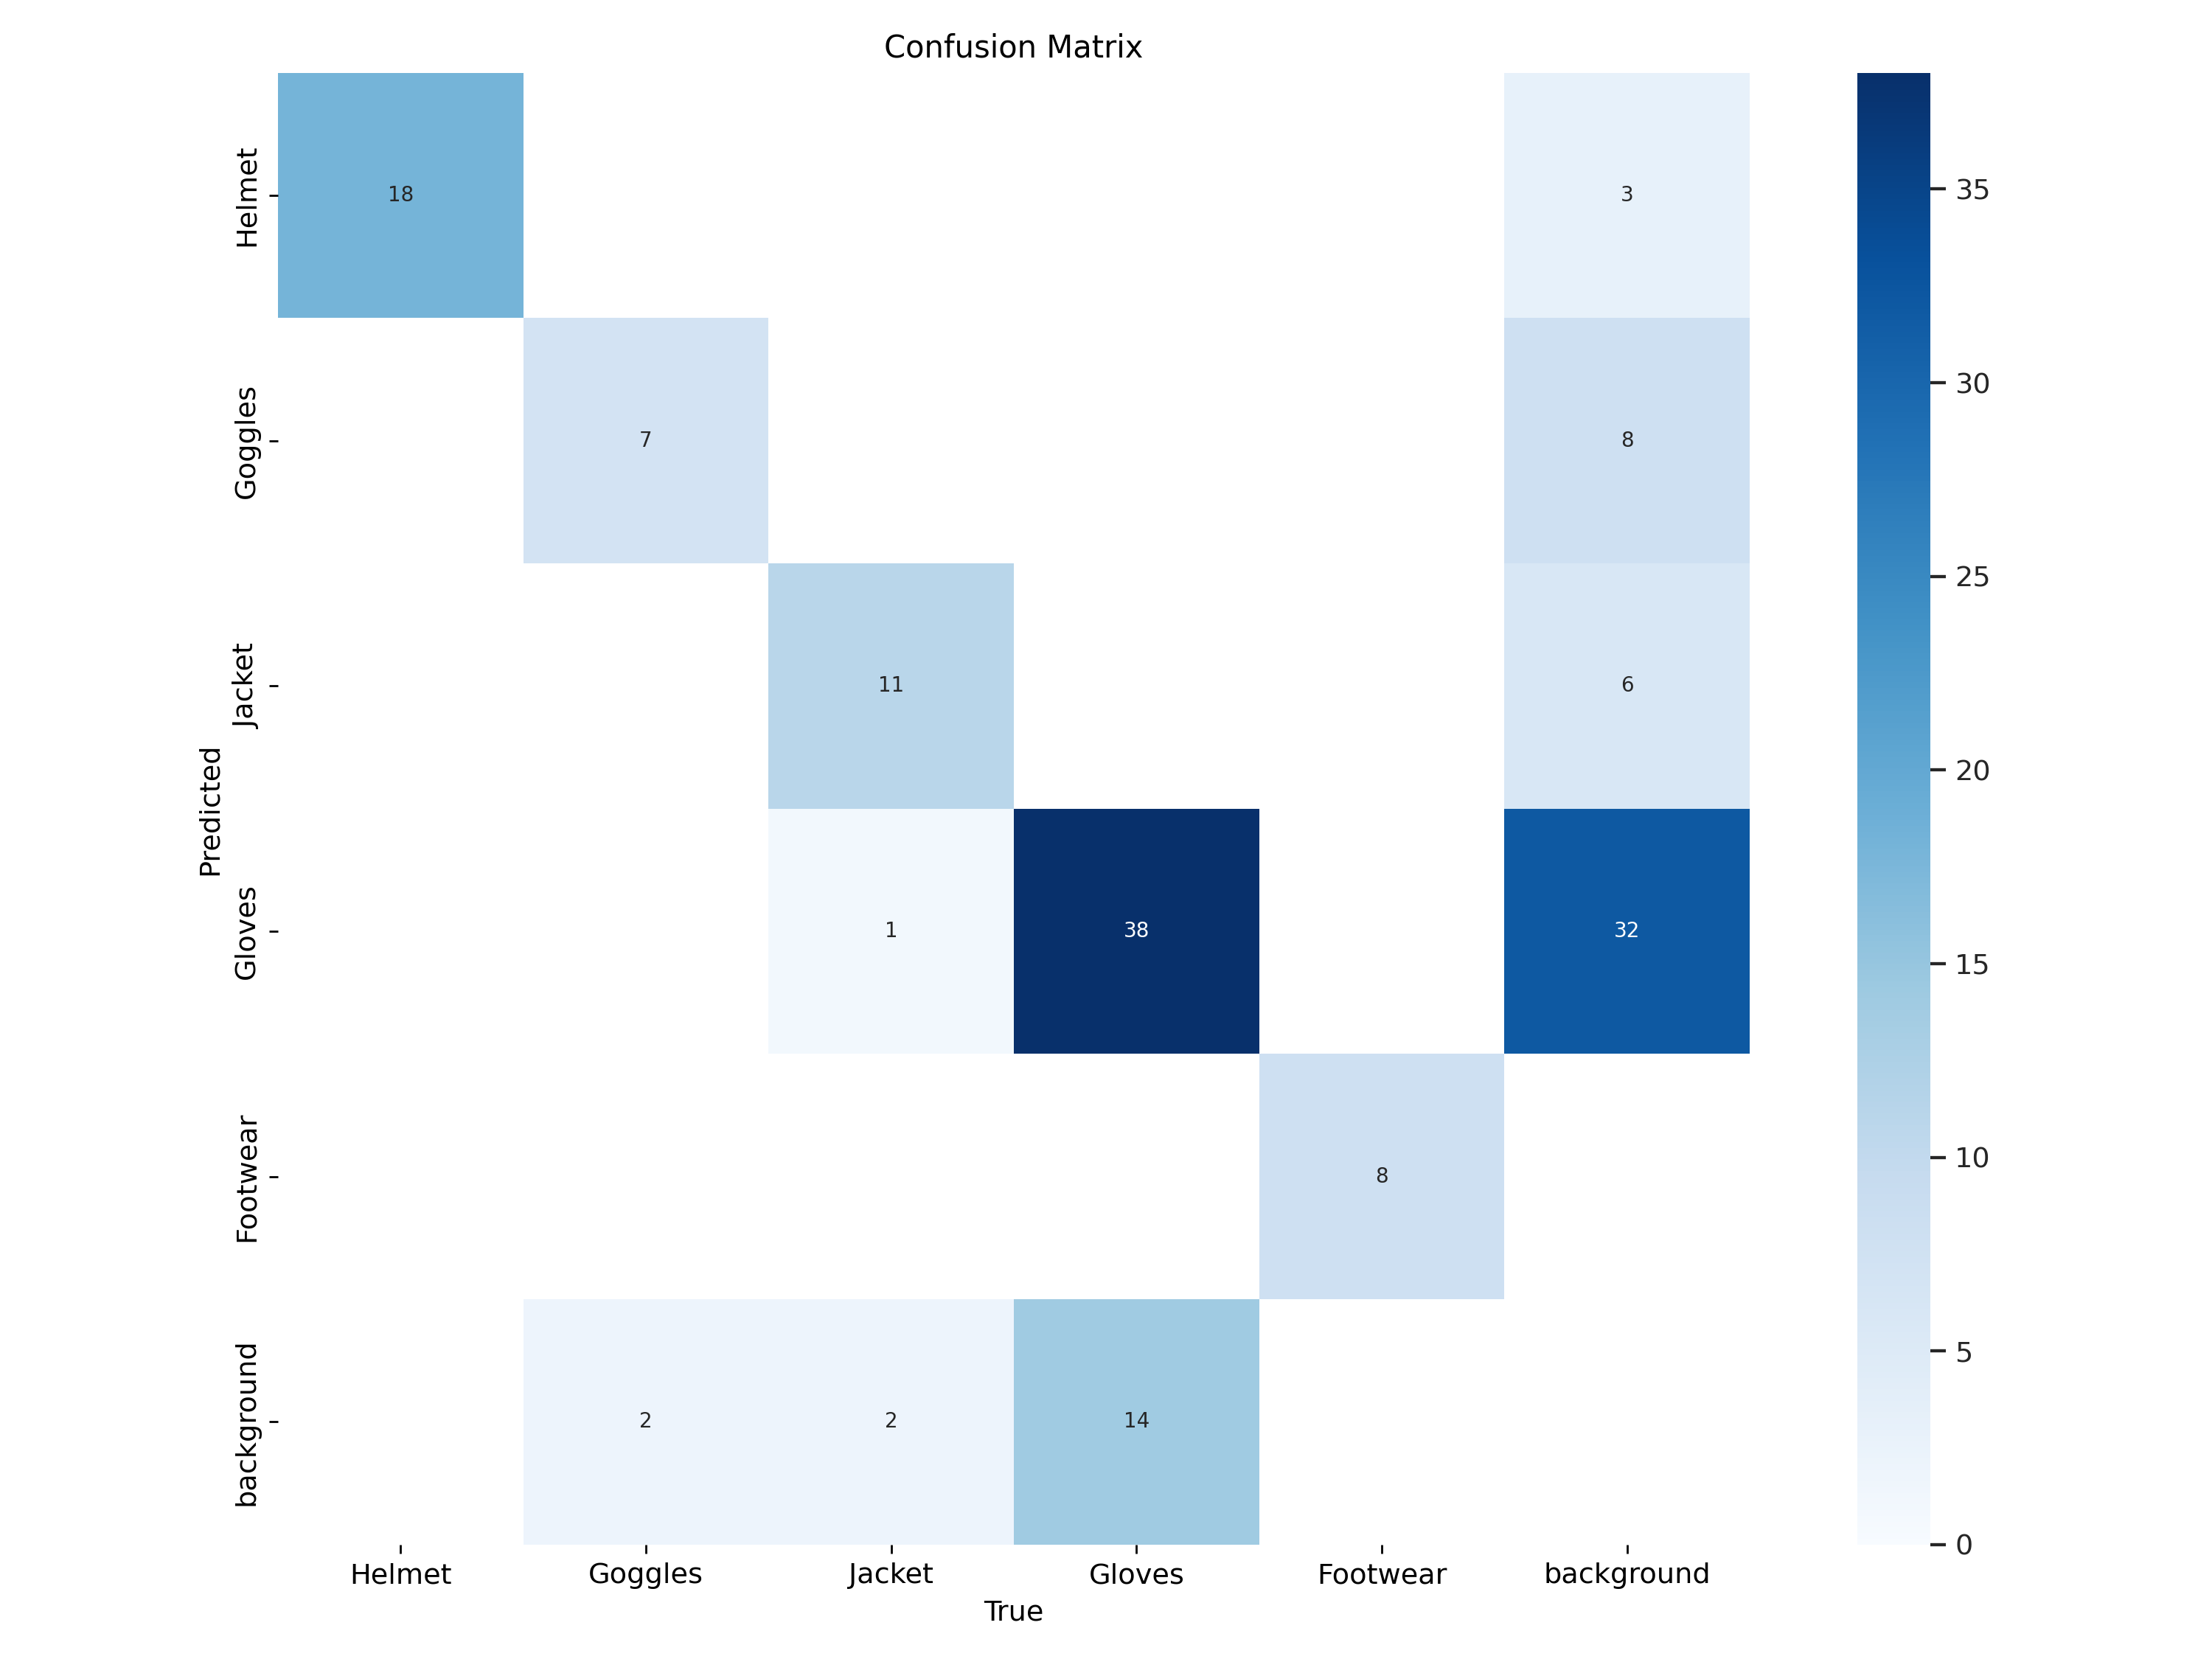

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

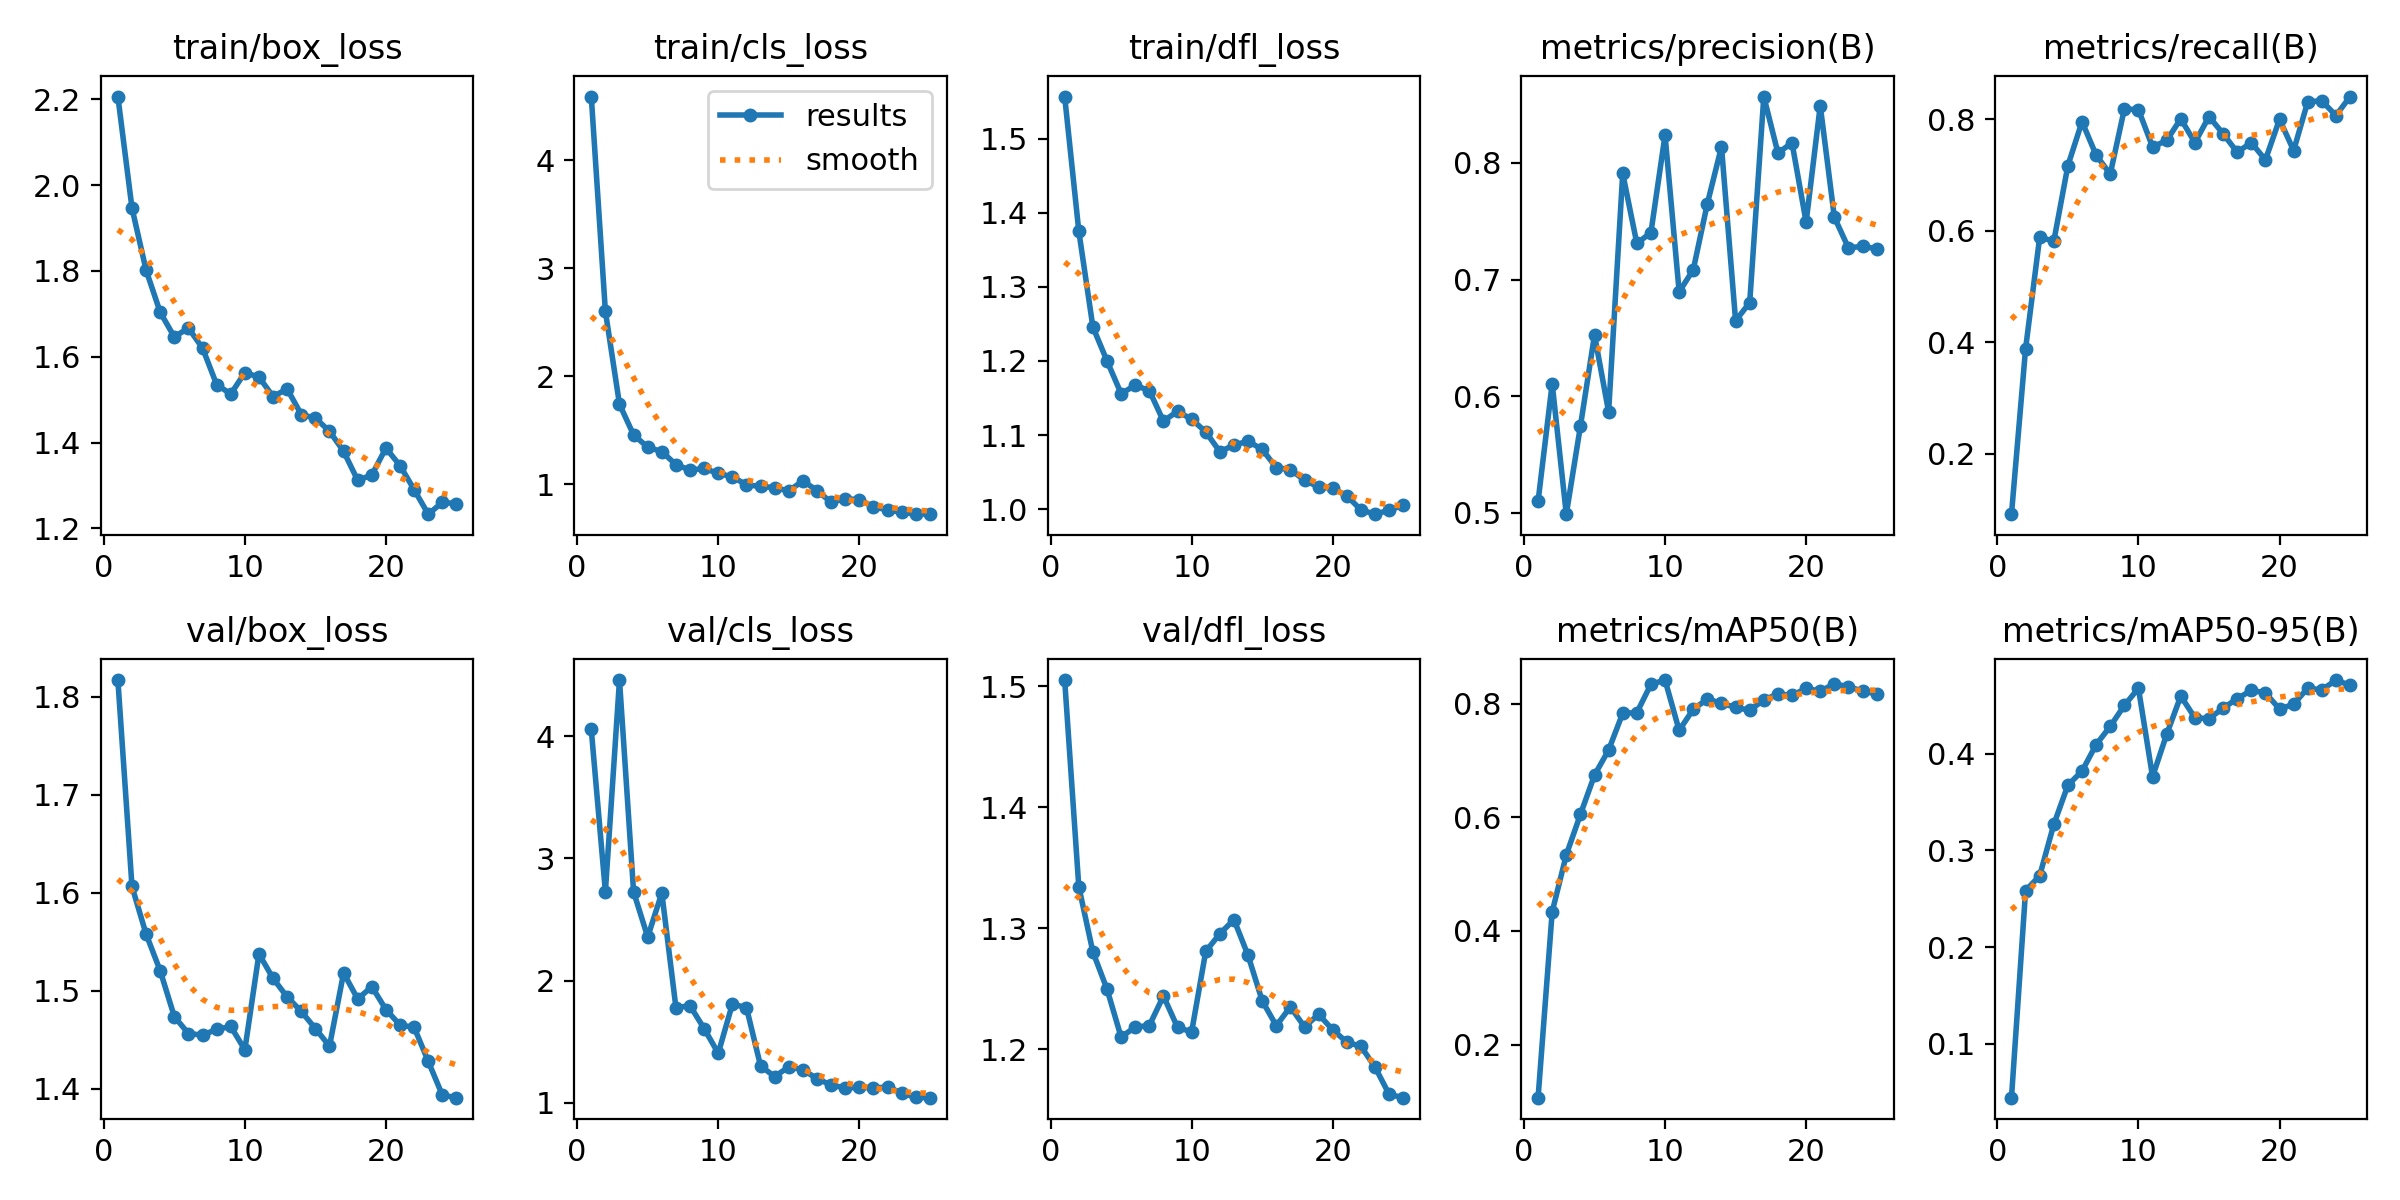

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

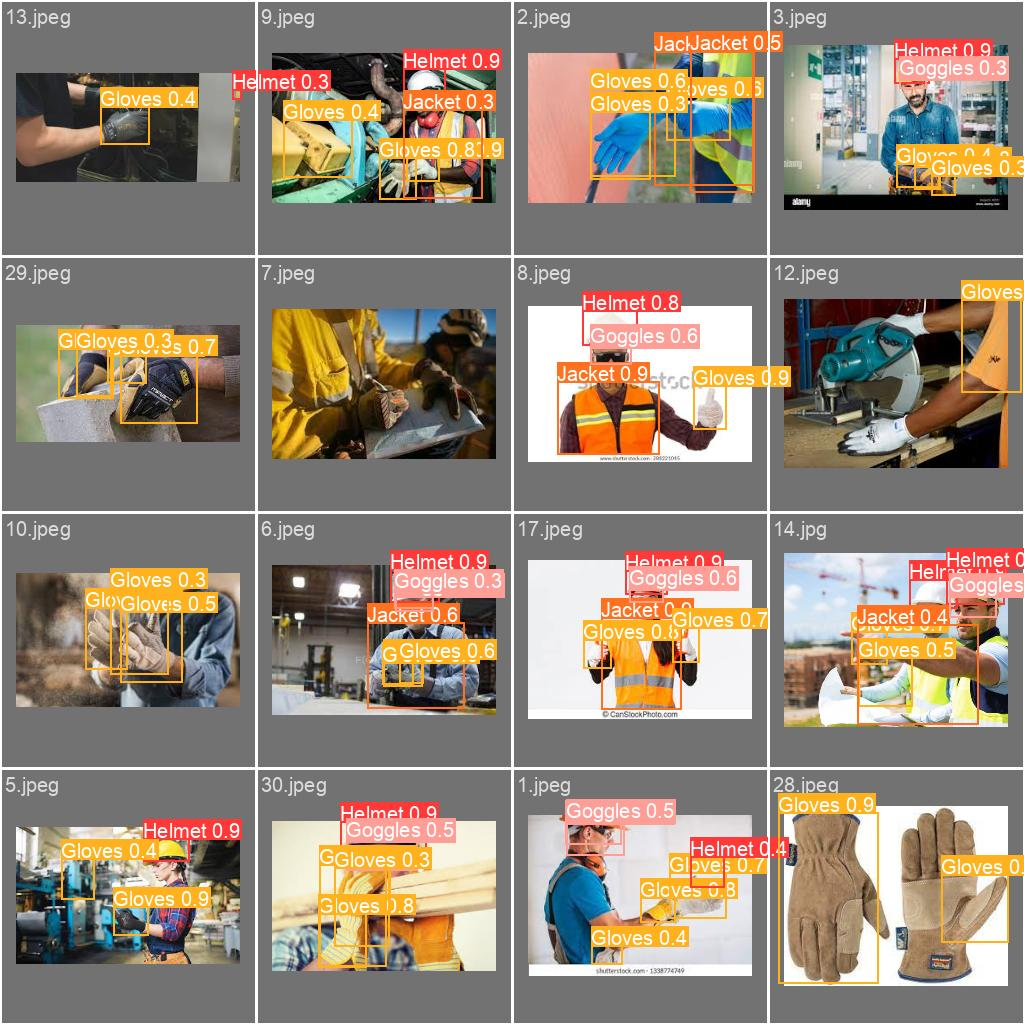

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:04<00:00,  2.20s/it]
                   all         31        101      0.748       0.84      0.838      0.476
                Helmet         31         18      0.898          1       0.96       0.67
               Goggles         31          9       0.52      0.726      0.734      0.316
                Jacket         31         14      0.789      0.857      0.866      0.576
                Gloves         31         52      0.562      0.615      0.635      0.364
              Footwear         31          8       0.97          1      0.995      0.452
Speed: 1.6ms preprocess, 115.6ms inferenc

Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /content/drive/MyDrive/Yolov8/data/test/images/1.jpeg: 192x224 1 Helmet, 2 Goggless, 3 Glovess, 95.7ms
image 2/31 /content/drive/MyDrive/Yolov8/data/test/images/10.jpeg: 160x224 3 Glovess, 102.7ms
image 3/31 /content/drive/MyDrive/Yolov8/data/test/images/11.jpeg: 224x224 2 Glovess, 109.9ms
image 4/31 /content/drive/MyDrive/Yolov8/data/test/images/12.jpeg: 192x224 1 Gloves, 91.9ms
image 5/31 /content/drive/MyDrive/Yolov8/data/test/images/13.jpeg: 128x224 1 Gloves, 72.6ms
image 6/31 /content/drive/MyDrive/Yolov8/data/test/images/14(1).jpeg: 224x224 (no detections), 98.8ms
image 7/31 /content/drive/MyDrive/Yolov8/data/test/images/14.jpg: 192x224 3 Helmets, 1 Jacket, 2 Glovess, 88.1ms
image 8/31 /content/drive/MyDrive/Yolov8/data/test/images/15.jpeg: 224x224 3 Glovess, 97.1ms
image 9/31 /content/drive/MyDrive/Yolov8